In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [5]:
! wget https://www.dropbox.com/sh/s9r1av3m4eatd3y/AAA8zYti5b5tnyKfcah2Reaja -O data

--2023-07-09 14:29:15--  https://www.dropbox.com/sh/s9r1av3m4eatd3y/AAA8zYti5b5tnyKfcah2Reaja
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /sh/raw/s9r1av3m4eatd3y/AAA8zYti5b5tnyKfcah2Reaja [following]
--2023-07-09 14:29:15--  https://www.dropbox.com/sh/raw/s9r1av3m4eatd3y/AAA8zYti5b5tnyKfcah2Reaja
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc078d4f84696633152e9d0e7228.dl.dropboxusercontent.com/zip_download_get/Bi7k6RaGQOSyt_v6As9XfBTuT788qUoMaTDK08vstA9DeQDxsjSg9Aoi_XxdLdNYDCbIj2JeCjgFrLA7UUE0JknLJrEIqPoLWCAiJC902pu12Q# [following]
--2023-07-09 14:29:16--  https://uc078d4f84696633152e9d0e7228.dl.dropboxusercontent.com/zip_download_get/Bi7k6RaGQOSyt_v6As9XfBTuT788qUoMaTDK08vstA9DeQDxsjSg9Aoi_XxdLdNYDCbIj2JeCjgFrLA7UUE0JknLJrEIqPoLW

In [6]:
!unzip data -d "images/"

Archive:  data
mapname:  conversion of  failed
replace images/Train/Pikachu/345.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [7]:
pip install keras_preprocessing

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.2 MB/s eta 0:00:00


In [8]:
classes = os.listdir("images/Train")

In [9]:
classes

['Charmander', 'Pikachu', 'Bulbasaur']

In [34]:
for pokemon_type in classes:
  path = "images/Train/" + pokemon_type
  print(f"{pokemon_type} - {len(os.listdir(path))}")


Charmander - 102
Pikachu - 101
Bulbasaur - 101


In [35]:
for pokemon_type in classes:
  path = "images/Test/" + pokemon_type
  print(f"{pokemon_type} - {len(os.listdir(path))}")


Charmander - 42
Pikachu - 40
Bulbasaur - 41


In [36]:
from keras_preprocessing import image

In [37]:
train_data = []
train_labels = []

In [38]:
for category in classes:
  folder = f"images/Train/{category}"
  for image_name in os.listdir(folder):
    img_path = os.path.join(folder, image_name)

    img = image.load_img(img_path, target_size = (100,100))
    img_array = image.img_to_array(img)
    train_data.append(img_array)
    train_labels.append(category)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [40]:
len(train_data)

304

In [41]:
train_data = np.array(train_data)
train_labels = np.array(train_labels)

In [42]:
train_data = train_data.reshape(len(train_data), 30000)

In [43]:
train_data.shape

(304, 30000)

In [44]:
category2label = {"Pikachu": 0, "Charmander": 1,"Bulbasaur": 2}
label2category = {0: "Pikachu", 1: "Charmander", 2: "Bulbasaur"}

In [45]:
train_labels = np.array([category2label[label] for label in train_labels])

In [46]:
from keras.utils import to_categorical

In [47]:
train_labels = to_categorical(train_labels)

In [48]:
train_labels

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1

In [49]:
from keras.layers import Dense
from keras import Sequential

In [50]:
features = train_data.shape[1]

In [51]:
model = Sequential()

In [64]:
model.add(Dense(units = 512, activation = 'relu', input_shape = (features,)))

In [65]:
model.add(Dense(units = 256, activation = 'relu'))

In [66]:
model.add(Dense(units = 128, activation = 'relu'))

In [67]:
model.add(Dense(units = 64, activation = 'relu'))

In [68]:
model.add(Dense(units = 3, activation = 'softmax'))

In [97]:
model.compile(optimizer = "adam",loss = "categorical_crossentropy", metrics = ["accuracy"])

In [98]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               15360512  
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dense_3 (Dense)             (None, 128)               32896     
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_6 (Dense)             (None, 3)                 195       
                                                                 
 dense_7 (Dense)             (None, 512)               2

In [99]:
model.fit(train_data, train_labels, batch_size = 32, epochs = 50)

Epoch 1/50
10/10 [==============================] - 6s 344ms/step - loss: 1.0992 - accuracy: 0.3355
Epoch 2/50
10/10 [==============================] - 3s 343ms/step - loss: 1.0987 - accuracy: 0.3355
Epoch 3/50
10/10 [==============================] - 3s 303ms/step - loss: 1.0987 - accuracy: 0.3355
Epoch 4/50
10/10 [==============================] - 4s 440ms/step - loss: 1.0987 - accuracy: 0.3355
Epoch 5/50
10/10 [==============================] - 3s 298ms/step - loss: 1.0987 - accuracy: 0.3355
Epoch 6/50
10/10 [==============================] - 3s 266ms/step - loss: 1.0988 - accuracy: 0.3355
Epoch 7/50
10/10 [==============================] - 3s 299ms/step - loss: 1.0986 - accuracy: 0.3355
Epoch 8/50
10/10 [==============================] - 4s 437ms/step - loss: 1.0986 - accuracy: 0.3355
Epoch 9/50
10/10 [==============================] - 3s 310ms/step - loss: 1.0988 - accuracy: 0.3355
Epoch 10/50
10/10 [==============================] - 3s 322ms/step - loss: 1.0987 - accuracy: 0.3355

In [101]:
test_image = "/content/download.png"
img = image.load_img(test_image, target_size = (100, 100))
img = image.img_to_array(img)
img.shape

(100, 100, 3)

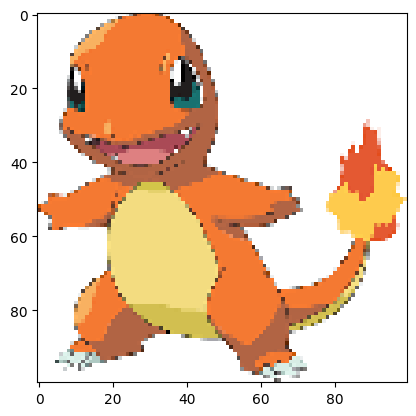

In [102]:
plt.imshow(img.astype('int'));

In [103]:
img = img.reshape(1, 30000)

In [104]:
model.predict(img).argmax()

1/1 [==============================] - 0s 142ms/step


1

In [105]:
pred = label2category[model.predict(img).argmax()]
pred

1/1 [==============================] - 0s 53ms/step


'Charmander'